In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pdvega

import rustacean_report

pd.set_option('display.max_colwidth', -1)
plt.style.use('ggplot')

In [3]:
%matplotlib inline

# Number of Packages

In [213]:
def load_number_of_packages(path):
    df = pd.read_csv(path, names = ['author_date_time', 'commit', 'package_count'])
    df['author_date_time'] = pd.to_datetime(df['author_date_time'])
    df = df.set_index('author_date_time')
    return df

In [214]:
df = pd.concat([load_number_of_packages('master.csv'),load_number_of_packages('snapshot-2018-09-26.csv')])
df['delta'] = df.package_count.diff(-1)

In [215]:
df

,commit,package_count,delta
author_date_time,,,
2018-12-14 06:14:46,b88404595d,20944,6.0
2018-12-13 23:59:56,a5fe16638a,20938,20.0
2018-12-12 23:54:32,5f22cf298d,20918,25.0
2018-12-11 23:24:32,71a83374e5,20893,50.0
2018-12-10 23:59:24,5bf7323431,20843,24.0
2018-12-09 23:58:30,99019d1d8f,20819,30.0
2018-12-08 23:39:37,72f194e838,20789,19.0
2018-12-07 23:41:58,70ef1311bb,20770,36.0
2018-12-06 23:50:19,3a0a1996d2,20734,26.0


In [219]:
df_m = df[(df.index.year >= 2018)]#.resample('D').agg('max')
df_m = df_m.reset_index()
#df_m['author_date_time'] = df_m['author_date_time'].dt.strftime('%Y-%m-%d')
df_m[['author_date_time', 'package_count']].to_json('vue/static/visualizing-crates-io/package-count.json', orient='records')

# Number of Revisions and Dependencies

In [3]:
! python package-deps.py > all-packages.json

In [50]:
df = pd.read_json('all-packages.json', orient = 'records', lines = True)

In [51]:
for kind in rustacean_report.DEP_KINDS:
    df['deps_count_' + kind] = df['deps_' + kind].str.len()

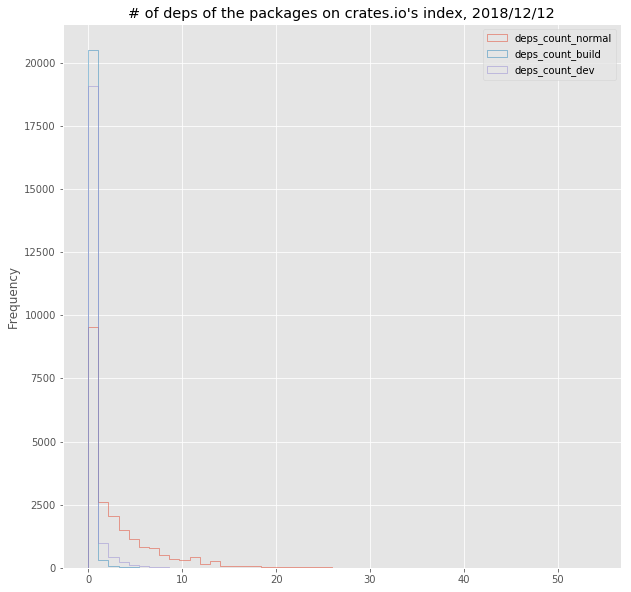

In [24]:
ax = df.fillna(0)[(df.revisions > 0)][['package', 'deps_count_normal', 'deps_count_build', 'deps_count_dev']].plot.hist(
    bins = 50, figsize = (10,10), 
    title = "# of deps of the packages on crates.io's index, 2018/12/12",
    histtype = 'step'
)

In [58]:
df.reset_index()[['revisions']].to_json('vue/static/visualizing-crates-io/package-revs.json', orient='records')

df[df.revisions > 50].reset_index()[['package', 'revisions']].to_json('vue/static/visualizing-crates-io/aged-packages.json', orient='records')

df.reset_index()[['deps_count_normal', 'deps_count_build', 'deps_count_dev']].fillna(0).to_json('vue/static/visualizing-crates-io/package-deps.json', orient='records')

In [211]:
df[(df.revisions >= 100)].package.count() / float(df.package.count())

0.0014324595330181922

###### def save_mature_packages(df_src):
    df = df_src.sort_values('revisions', ascending = False).head(20)[['package', 'revisions']]
    df.reset_index().to_json('vue/static/visualizing-crates-io/mature-packages.json', orient = 'records')

save_mature_packages(df)


In [220]:
df_count = df.fillna(0)[['package', 'deps_count_normal', 'deps_count_build', 'deps_count_dev','revisions']]

KeyError: "['package' 'deps_count_normal' 'deps_count_build' 'deps_count_dev'\n 'revisions'] not in index"

In [17]:
ax.figure.savefig('deps-hist.png', dpi = 200)

In [32]:
reload(rustacean_report)
import json
x = {
    'normal': rustacean_report.histogram(df_count.deps_count_normal),
    'dev': rustacean_report.histogram(df_count.deps_count_dev),
    'build': rustacean_report.histogram(df_count.deps_count_build),
}

f = open('vue/static/visualizing-crates-io/deps-histogram.json', 'w')
f.write(json.dumps(x))
f.close()

In [199]:
reload(rustacean_report)
import json
x = {
    'revisions': np.histogram(df.revisions, bins = range(1,23))[0].tolist()[0:20],
}

f = open('vue/static/visualizing-crates-io/package-age.json', 'w')
f.write(json.dumps(x))
f.close()

In [192]:
np.histogram(df.revisions, bins = range(1,20))

(array([6892, 3231, 2200, 1547, 1178,  862,  687,  530,  456,  433,  393,
         312,  295,  167,  177,  140,  139,  218]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]))

In [188]:
np.histogram(df.revisions, bins = 20)

(array([19500,  1066,   191,    99,    42,    13,     9,     6,     1,
            3,     3,     1,     1,     2,     0,     0,     0,     0,
            0,     6]),
 array([  1.  ,  16.55,  32.1 ,  47.65,  63.2 ,  78.75,  94.3 , 109.85,
        125.4 , 140.95, 156.5 , 172.05, 187.6 , 203.15, 218.7 , 234.25,
        249.8 , 265.35, 280.9 , 296.45, 312.  ]))

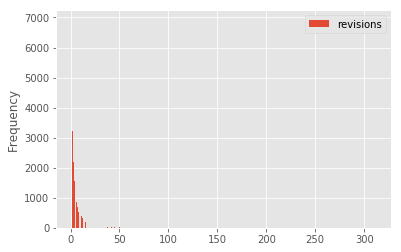

In [170]:
df[['revisions']].plot.hist(bins = 1000)

In [75]:
np.histogram(df_count.deps_count_dev, bins = range(0, 100))

(array([16363,  2725,   968,   441,   217,   102,    60,    27,    15,
           10,     9,     3,     1,     0,     1,     0,     0,     0,
            0,     1,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4

In [76]:
np.histogram(df_count.deps_count_build, bins = range(0, 100))

(array([19349,  1149,   296,    77,    36,    12,     7,     8,     3,
            5,     0,     0,     1,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 4

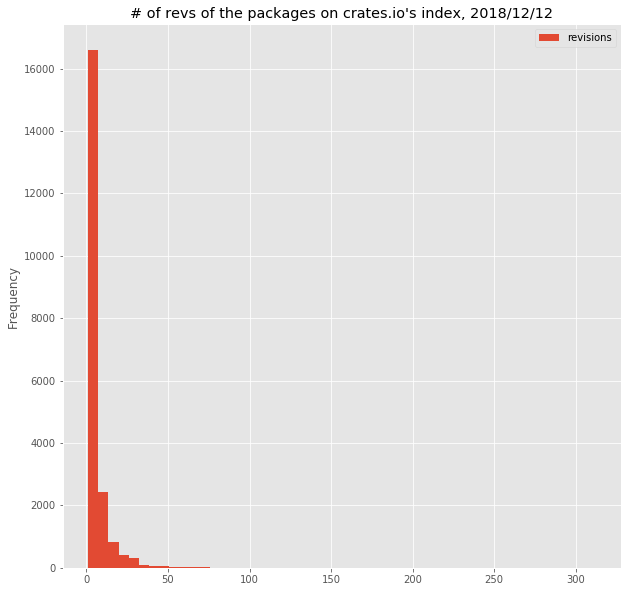

In [192]:
ax = df[['package', 'revisions']].plot.hist(bins = 50, figsize = (10,10), title = "# of revs of the packages on crates.io's index, 2018/12/12")

In [193]:
ax.figure.savefig('revs-hist.png', dpi = 200)

# Number of Clients

In [59]:
reload(rustacean_report)
df = df.set_index('package')
df_clients = rustacean_report.collect_clients(df).fillna(0)

In [60]:
def save_popular_packages(df_src, key):
    column = 'clients_count_' + key
    df = df_src.sort_values(column, ascending = False).head(20)[[column]]
    df['count'] = df[column]
    df[['count']].reset_index().to_json('vue/static/visualizing-crates-io/popular-' + key + '-packages.json', orient = 'records')

save_popular_packages(df_clients, 'normal')
save_popular_packages(df_clients, 'dev')
save_popular_packages(df_clients, 'build')

In [61]:
df_deps_clients = df.join(df_clients, how = 'inner').fillna(0).reset_index()
df_deps_clients

,index,deps__missing,deps__none,deps_build,deps_dev,deps_normal,revisions,deps_count_build,deps_count_dev,deps_count_normal,clients_build,clients_dev,clients_normal,clients_count_build,clients_count_dev,clients_count_normal
0,k,0,0,0,"[glfw, kiss3d, rand]","[log, nalgebra, urdf-rs]",23,0.0,3.0,3.0,[],[],"[gear, urdf-viz]",0,0,2
1,m,0,0,0,[quickcheck],0,2,0.0,1.0,0.0,[],[],[madgwick],0,0,1
2,a2,0,0,0,[argparse],"[base64, chrono, crossbeam, erased-serde, futures, http, hyper, hyper-alpn, indoc, log, openssl, pretty_env_logger, serde, serde_derive, serde_json, time, tokio, tokio-io, tokio-timer]",10,0.0,1.0,19.0,[],[],[xorc-notifications],0,0,1
3,ao,0,0,0,0,[libc],8,0.0,0.0,1.0,[],[pure_vorbis],[],0,1,0
4,ar,0,0,0,0,[byteorder],9,0.0,0.0,1.0,[],[],"[cargo-bundle, cargo-deb, debarchive, elfkit, ptx-linker]",0,0,5
5,bn,0,0,0,[bincode],"[rustc-serialize, byteorder, rand]",10,0.0,1.0,3.0,[],[],[zksnark],0,0,1
6,bv,0,0,[feature-probe],[quickcheck],[serde],29,1.0,1.0,1.0,[],[],"[bio, tuneutils]",0,0,2
7,c3,0,0,0,0,"[clang-sys, c3_clang_extensions]",12,0.0,0.0,2.0,[],[],[citrus],0,0,1
8,cc,0,0,0,[tempdir],[rayon],28,0.0,1.0,1.0,"[nx, dbr, dfp, fap, gtk, nix, tsc, abort, aflak_imgui-sys, anitomy-sys, ansi_colours, argonautica, autograd, backtrace-sys, binaryen-sys, binutils, bitcoinconsensus, blake2_c, box_stream, brotli-sys, bulletproof, bzip2-sys, c-ares-sys, c3_clang_extensions, capstone-sys, civet-sys, clear_on_drop, clickhouse-rs-cityhash-sys, cloudflare-zlib-sys, cntr-nix, compiler_builtins, context, cpp_new, cpp_new_simple_cpp_lib, crfsuite-sys, croaring-sys, cryptonight-rs, ctaes-sys, cumath, curl-sys, decimal, dpdk-sys, drone-fatfs-raw, ekiden-grpcio-sys, emerald-librocksdb-sys, emlib, euphrates_x64, exonum_librocksdb-sys, exonum_libsodium-sys, fastlz-sys, ffmpeg-sys, flann-sys, gaviota-sys, generator, gettext-sys, gpgme-sys, grcov, groestl-aesni, grpcio-sys, guetzli-sys, hacl-star-sys, hidapi, hidapi-sys, horde3d-sys, http-muncher, icasadi, imagequant-sys, imgui-sys, immer-rs, impersonate, indexlist, interfaces2, issue-47048-fix, j2534, jemalloc-sys, jh-x86_64, jsmn-rs, kres, lcms2-sys, libc-spawn, libc-stdhandle, libgcrypt-sys, libgit2-sys, libgpg-error-sys, liblightning, libloading, libmodbus-sys, libnghttp2-sys, libobliv-sys, libopencm3_sys, libpng-sys, librocksdb-sys, libsbc-sys, libsodium-ffi, libsodium-sys, libsqlcipher-sys, libsqlite3-sys, libssh2-sys, libthemis-sys, libwebp-sys, ...]",[sccache],"[afl, autotools, cmake, cpp_build, ctest, dictcc-cli, dinghy-build, libasm, lttng-ust-generate, nitrocli, oblivc, openssl-src, rust_c, rust_qt_binding_generator, verilator]",218,1,15
9,fd,0,0,0,0,[libc],6,0.0,0.0,1.0,[],[],"[tty, fdpass, stemjail]",0,0,3


In [62]:
df_deps_clients[
    (df_deps_clients.clients_count_normal > 500) | (df_deps_clients.clients_count_dev > 50) | (df_deps_clients.clients_count_build > 10)
].reset_index()[[
    'index', 'revisions',
#    'deps_count_normal', 'deps_count_build', 'deps_count_dev',
    'clients_count_normal', 'clients_count_build', 'clients_count_dev',
]].fillna(0).to_json('vue/static/visualizing-crates-io/popular-packages.json', orient='records')

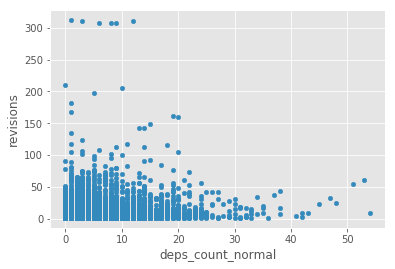

In [198]:
df_deps_clients[['revisions', 'deps_count_normal']].fillna(0).plot.scatter('deps_count_normal', 'revisions')

In [13]:
df_deps_clients[['deps_count_normal', 'clients_count_normal']].fillna(0).plot.scatter('clients_count_normal', 'deps_count_normal')

NameError: name 'df_deps_clients' is not defined

# Developer Activity

In [73]:
def crates_io_dow(df):
    result = df.copy()
    result['author_date_time'] = pd.to_datetime(df['author_date_time'])
    result = result.resample('H', on = 'author_date_time').count()
    result = result[['commit']].reset_index()
    
    # Pandas' 0 is Monday whereas strftime's 0 is Sunday
    result['dow'] = (result['author_date_time'].dt.weekday + 1) % 7
    result['dow_hour'] = result['author_date_time'].dt.strftime('%w-%H')
    result['hour'] = result['author_date_time'].dt.hour
    
    return result

In [26]:
! GIT_DIR=repos/crates.io-index/.git git log \
  --format=%aI,%h 'snapshot-2018-09-26' > git-log-snapshot-2018-1.csv

In [28]:
! GIT_DIR=repos/crates.io-index/.git git log \
  --format=%aI,%h master > git-log-snapshot-2018-2.csv

In [74]:
df1 = pd.read_csv('git-log-snapshot-2018-1.csv', names = ['author_date_time', 'commit'])
df2 = pd.read_csv('git-log-snapshot-2018-2.csv', names = ['author_date_time', 'commit'])
df = crates_io_dow(pd.concat([df1, df2]))

In [75]:
df[(df.author_date_time.dt.year == 2018)]

,author_date_time,commit,dow,dow_hour,hour
27673,2018-01-01 00:00:00,1,1,1-00,0
27674,2018-01-01 01:00:00,3,1,1-01,1
27675,2018-01-01 02:00:00,4,1,1-02,2
27676,2018-01-01 03:00:00,4,1,1-03,3
27677,2018-01-01 04:00:00,1,1,1-04,4
27678,2018-01-01 05:00:00,1,1,1-05,5
27679,2018-01-01 06:00:00,1,1,1-06,6
27680,2018-01-01 07:00:00,2,1,1-07,7
27681,2018-01-01 08:00:00,2,1,1-08,8
27682,2018-01-01 09:00:00,2,1,1-09,9


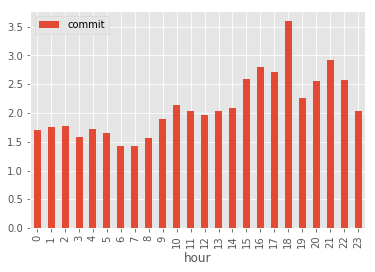

In [93]:
df[(df.author_date_time.dt.year == 2015)].groupby('hour').mean()[['commit']].plot.bar()

In [58]:
df[(df.author_date_time.dt.year == 2018)][['commit', 'hour']].groupby('hour').max()

,commit
hour,
0,71
1,34
2,70
3,57
4,43
5,37
6,76
7,39
8,30


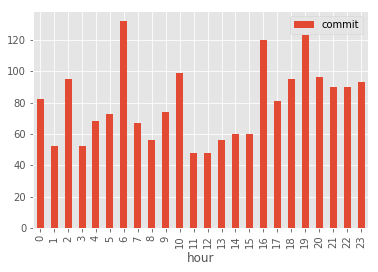

In [136]:
df[(df.author_date_time.dt.year == 2014)].groupby('hour').sum()[['commit']].plot.bar()

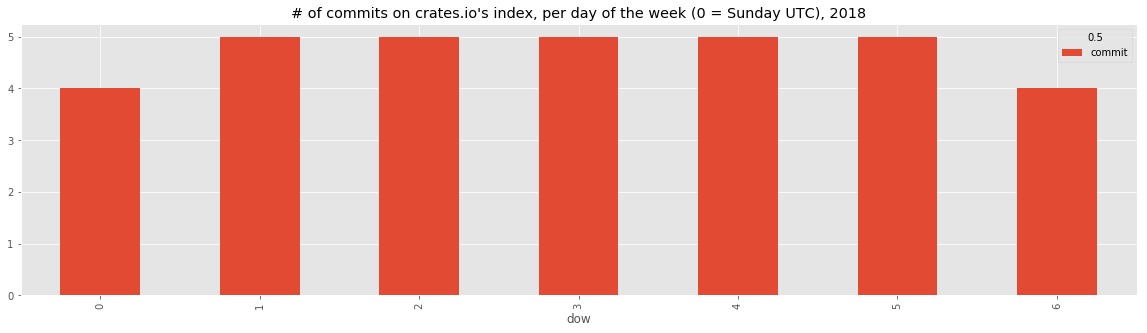

In [142]:
ax = df.groupby('dow').quantile(.5)[['commit']].plot.bar(figsize = (20,5),
                                                  title = "# of commits on crates.io's index, per day of the week (0 = Sunday UTC), 2018")

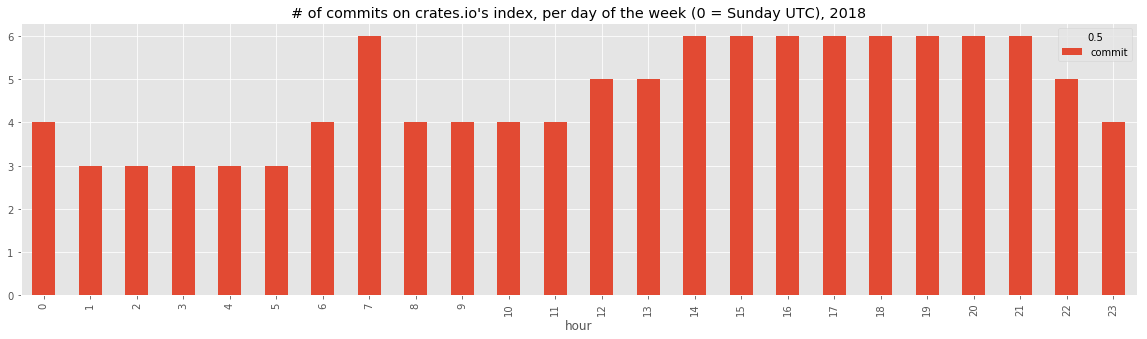

In [143]:
ax = df.groupby('hour').quantile(.5)[['commit']].plot.bar(figsize = (20,5),
                                                  title = "# of commits on crates.io's index, per day of the week (0 = Sunday UTC), 2018")

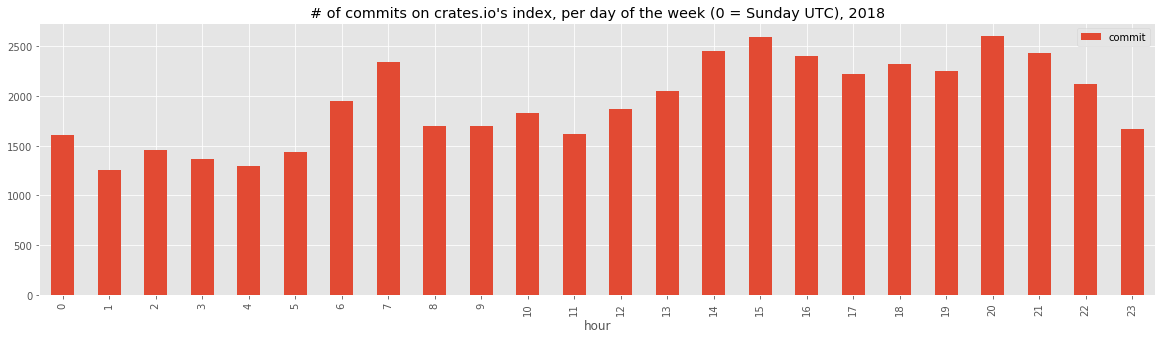

In [144]:
ax = df.groupby('hour').sum()[['commit']].plot.bar(figsize = (20,5),
                                                  title = "# of commits on crates.io's index, per day of the week (0 = Sunday UTC), 2018")

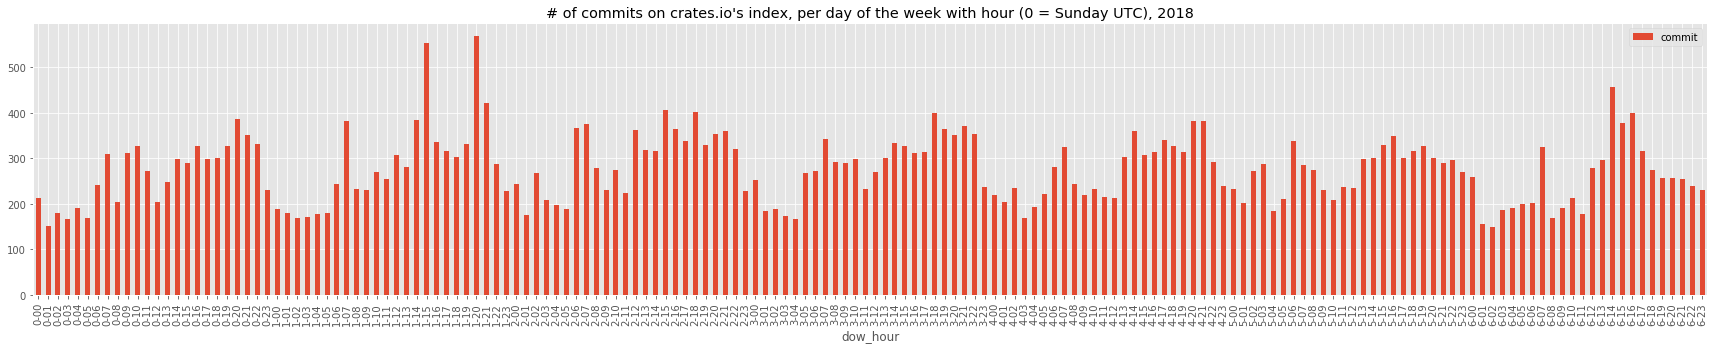

In [321]:
ax = df.groupby('dow_hour').sum()[['commit']].plot.bar(figsize = (30,5), title = "# of commits on crates.io's index, per day of the week with hour (0 = Sunday UTC), 2018")

In [322]:
ax.figure.savefig('2018-dow-with-hour.png', dpi = 200)

In [323]:
! GIT_DIR=repos/crates.io-index/.git git log \
  --format=%aI,%h 'snapshot-2018-09-26' \
  --after '2017-01-01T00:00:00' --before '2018-01-01T00:00:00' > git-log-snapshot-2017.csv

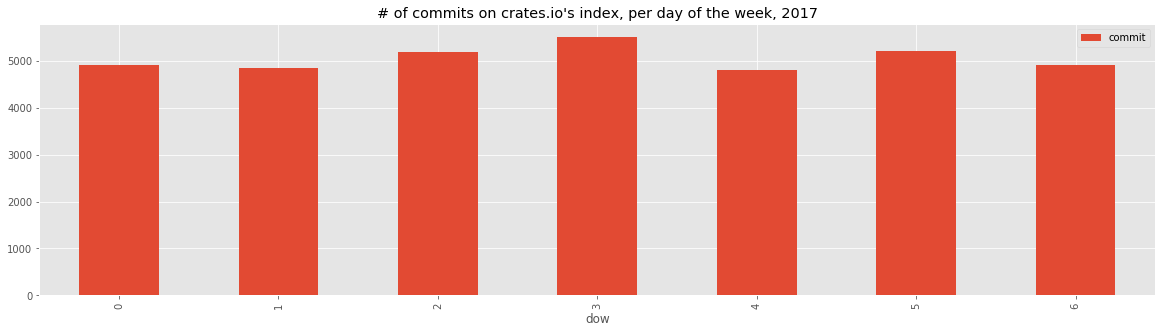

In [324]:
df = pd.read_csv('git-log-snapshot-2017.csv', names = ['author_date_time', 'commit'])
df = crates_io_dow(df)
df.groupby('dow').sum()[['commit']].plot.bar(figsize = (20,5), title = "# of commits on crates.io's index, per day of the week, 2017")

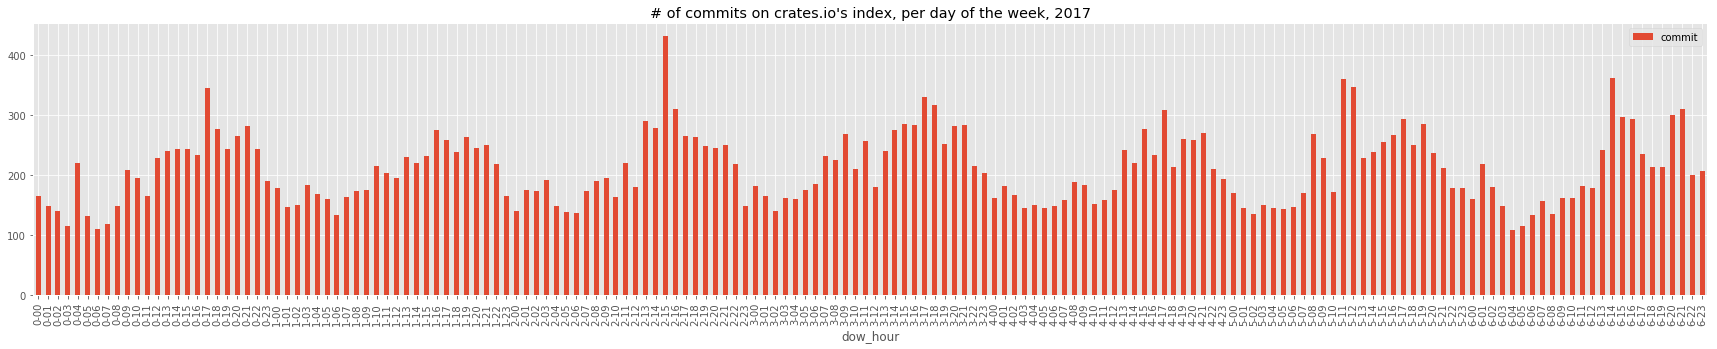

In [325]:
df.groupby('dow_hour').sum()[['commit']].plot.bar(figsize = (30,5), title = "# of commits on crates.io's index, per day of the week, 2017")

In [305]:
! GIT_DIR=repos/crates.io-index/.git git log \
  --format=%aI,%h 'snapshot-2018-09-26' \
  --after '2016-01-01T00:00:00' --before '2017-01-01T00:00:00' > git-log-snapshot-2016.csv

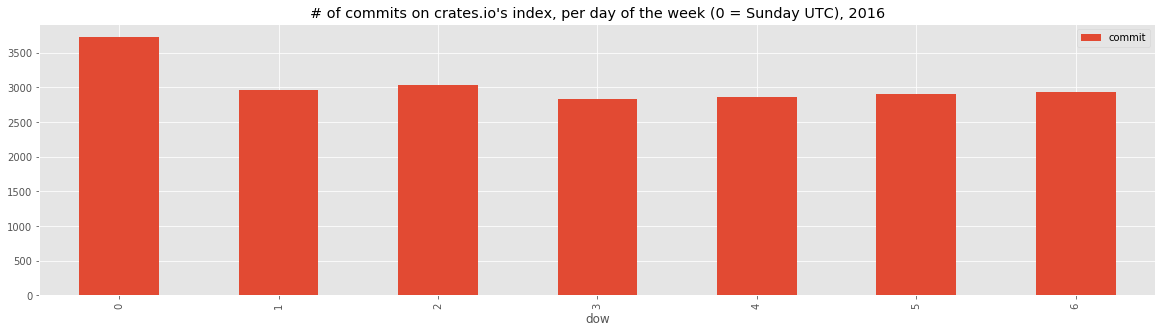

In [332]:
df = pd.read_csv('git-log-snapshot-2016.csv', names = ['author_date_time', 'commit'])
df = crates_io_dow(df)
ax = df.groupby('dow').sum()[['commit']].plot.bar(figsize = (20,5),
                                             title = "# of commits on crates.io's index, per day of the week (0 = Sunday UTC), 2016")

In [307]:
ax.figure.savefig('2016-dow.png', dpi = 200)

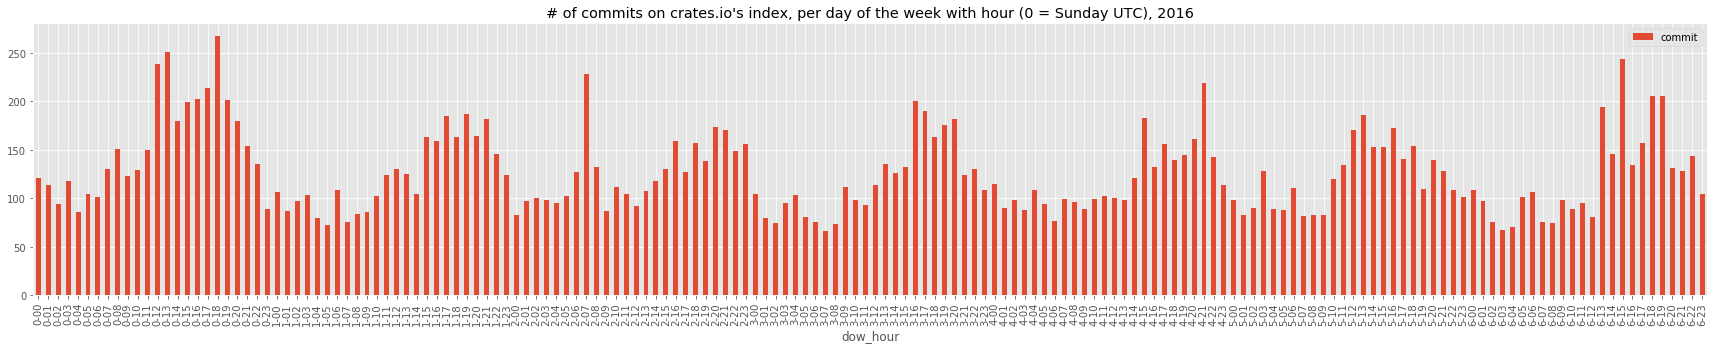

In [308]:
ax = df.groupby('dow_hour').sum()[['commit']].plot.bar(figsize = (30,5),
                                                  title = "# of commits on crates.io's index, per day of the week with hour (0 = Sunday UTC), 2016")

In [309]:
ax.figure.savefig('2016-dow-with-hour.png', dpi = 200)

In [310]:
! GIT_DIR=repos/crates.io-index/.git git log \
  --format=%aI,%h 'snapshot-2018-09-26' \
  --after '2015-01-01T00:00:00' --before '2016-01-01T00:00:00' > git-log-snapshot-2015.csv

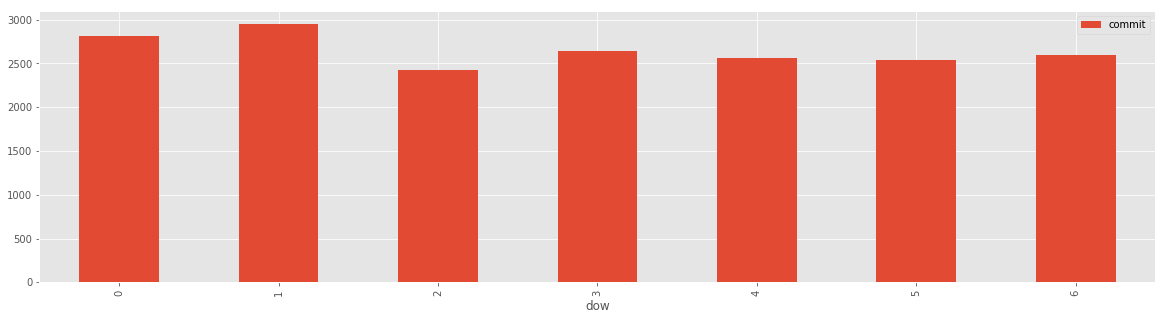

In [331]:
df = pd.read_csv('git-log-snapshot-2015.csv', names = ['author_date_time', 'commit'])
df = crates_io_dow(df)
ax = df.groupby('dow').sum()[['commit']].plot.bar(figsize = (20,5))

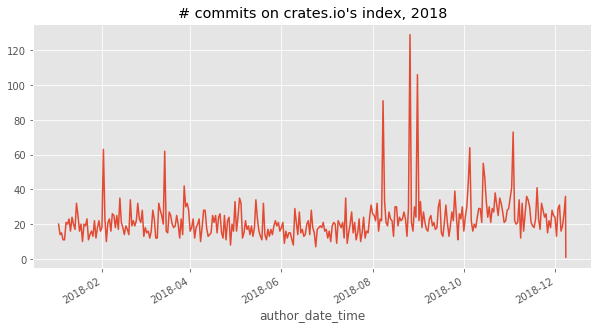

In [33]:
ax = df['delta'].plot(title = "# commits on crates.io's index, 2018", figsize = (10,5))

In [34]:
ax.figure.savefig('delta.png', dpi = 200)

In [37]:
df = df.reset_index()
df['weekday'] = df['author_date_time'].dt.weekday

In [45]:
df

,index,author_date_time,commit,package_count,delta,weekday
0,0,2018-12-08 05:12:08,cf7e93e097,24160,1.0,5
1,1,2018-12-07 23:41:58,70ef1311bb,24159,36.0,4
2,2,2018-12-06 23:50:19,3a0a1996d2,24123,26.0,3
3,3,2018-12-05 23:50:25,8a7d40451f,24097,19.0,2
4,4,2018-12-04 23:52:00,ce1c4fb09e,24078,16.0,1
5,5,2018-12-03 22:55:13,d7c85ba9a4,24062,31.0,0
6,6,2018-12-02 23:40:03,c06f2c599a,24031,29.0,6
7,7,2018-12-01 23:56:50,177b3842e5,24002,13.0,5
8,8,2018-11-30 23:55:09,801426056b,23989,24.0,4
9,9,2018-11-29 23:53:45,993cb1d15f,23965,25.0,3
